In [1]:
import tensorflow as tf
import numpy as np

In [2]:
model64 = tf.keras.models.load_model('reuters-embedding-64')

model64.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 4, 64)             1982656   
                                                                 
 global_average_pooling1d_5   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 30979)             2013635   
                                                                 
Total params: 3,996,291
Trainable params: 3,996,291
Non-trainable params: 0
_________________________________________________________________


In [3]:
l = model64.layers

l[0](np.array([10], dtype=np.int32))

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[-1.6989127e+00, -7.7718902e-01, -4.0175929e+00,  2.1976769e-01,
        -5.8265843e+00, -1.0116373e+00,  2.6975234e+00, -4.2153268e+00,
         2.0656972e+00, -5.0064546e-01,  2.4033661e+00, -2.4170632e+00,
        -1.6841353e+00, -9.7482550e-01, -4.2845011e+00, -3.6573343e-02,
         3.6279511e+00, -6.1201441e-01, -2.7712164e+00,  2.2730803e-01,
         1.3106331e+00,  3.0963371e+00, -4.2050919e-01,  1.0914828e+00,
        -6.1704242e-01,  2.6948719e+00,  9.6626729e-01,  4.1389742e+00,
         2.1939816e+00, -1.2664010e-01,  3.0259821e+00,  1.9940581e+00,
         1.1708055e+00,  1.3572962e+00,  3.4962409e+00,  5.7816297e-02,
        -1.2016355e+00, -6.1332077e-01, -1.7032288e+00, -2.5947123e+00,
        -1.7615746e+00,  4.9385583e-01, -2.2041309e+00, -4.7800641e+00,
        -2.3696399e+00, -2.0671265e+00,  9.0573275e-01, -3.3888571e+00,
         3.5939972e+00,  2.6691945e+00,  1.3186578e+00, -1.7552187e-01,
        -1.1733

In [4]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.reuters.load_data()

word_index = tf.keras.datasets.reuters.get_word_index()

index_to_word = dict()

for key, val in word_index.items():
    index_to_word[val] = key

In [5]:
from numpy.linalg import norm
   
# word index from dataset has 3 reserved words, thus minus 3
# see: https://technotes.webriki.com/2019/06/reserved-indices-in-keras-reuters-data.html

def get_word(idx):
    return index_to_word.get(idx-3, '?')

def embedding64(word):    
    embedding = word_index[word]
    
    return model64.layers[0](embedding)

def cos_sim(embed1, embed2):
    return np.dot(embed1, embed2) / (norm(embed1) * norm(embed2))  

In [6]:
words = []

for i in range(20, 400):
    words.append(get_word(i))

print(words)

['pct', 'on', 'from', 'is', 'that', 'its', 'cts', 'by', 'at', 'year', 'be', 'with', '2', 'will', 'was', 'billion', 'he', 'u', 's', 'net', 'has', 'would', 'an', 'as', '5', 'not', 'loss', '4', '1986', 'company', 'which', 'but', 'this', 'shr', 'last', 'are', 'lt', 'have', 'or', '6', 'bank', '7', 'were', '8', 'had', 'oil', 'trade', 'share', 'one', 'about', '0', 'inc', '9', 'new', 'profit', 'also', 'market', 'they', 'two', 'shares', 'stock', 'corp', 'tonnes', '10', 'up', 'been', 'revs', 'prices', 'sales', '1987', 'per', 'may', 'after', 'april', 'march', 'more', 'price', 'than', 'quarter', 'first', 'other', 'rate', '15', 'group', 'february', '1985', 'government', 'if', 'exchange', 'three', 'january', 'co', 'against', 'dollar', 'could', 'we', 'offer', 'over', 'told', '20', 'agreement', 'week', 'production', 'note', '30', 'their', 'some', 'foreign', 'interest', 'no', 'japan', 'tax', '50', 'expected', '12', 'total', 'under', 'all', 'rose', 'month', 'rates', 'international', 'five', 'current', '

In [12]:
def test_similarity(word1, word2):
    print(f'similarity between {word1} and {word2}:', cos_sim(embedding64(word1), embedding64(word2)))

test_similarity('government', 'federal') 
test_similarity('war', 'attack')
test_similarity('countries', 'nations')
test_similarity('income', 'profit')
test_similarity('spending', 'loss')
test_similarity('finance', 'money')
test_similarity('price', 'market')

test_similarity('legal', 'tender')
test_similarity('september', 'january')
test_similarity('september', 'october')
test_similarity('yesterday', 'tomorrow')
test_similarity('budget', 'money')

test_similarity('domestic', 'national')
test_similarity('wheat', 'grain')
test_similarity('american', 'japanese')
test_similarity('sale', 'sell')

similarity between government and federal: 0.18746066
similarity between war and attack: 0.32019955
similarity between countries and nations: 0.21728471
similarity between income and profit: 0.38419676
similarity between spending and loss: 0.15735814
similarity between finance and money: 0.13988021
similarity between price and market: 0.28216153
similarity between legal and tender: 0.25195867
similarity between september and january: 0.09544329
similarity between september and october: -0.0714013
similarity between yesterday and tomorrow: 0.1852629
similarity between budget and money: 0.12563153
similarity between domestic and national: 0.21061207
similarity between wheat and grain: 0.19108842
similarity between american and japanese: 0.36455837
similarity between sale and sell: -0.047828145


In [8]:
from sklearn.manifold import TSNE
import pandas as pd

embeddings = []

for word in words:
    embeddings.append(embedding64(word))

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(np.array(embeddings))

df = pd.DataFrame(embeddings_tsne, index=words, columns=['x', 'y'])


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-wep2wydt because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


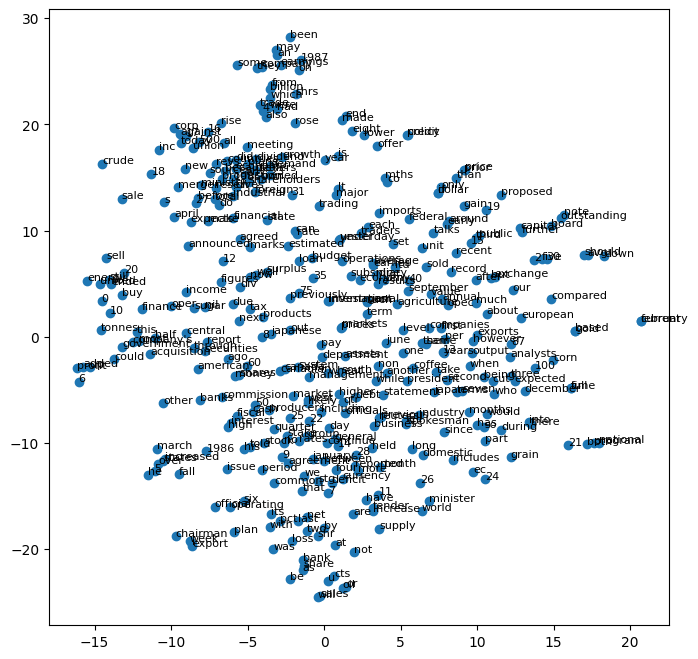

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=8)
plt.show()